# Word2Vec

In [42]:
import os
os.getcwd()

'/Users/gretel.depaepe/Documents/Projects/discovery-projects/deep_space_9_devoxx'

<font color='purple' size=4>Word2Vec is based on the linguistic theory that one can know a word by the company it keeps, meaning semantic representations can be derived from word co-occurrence.

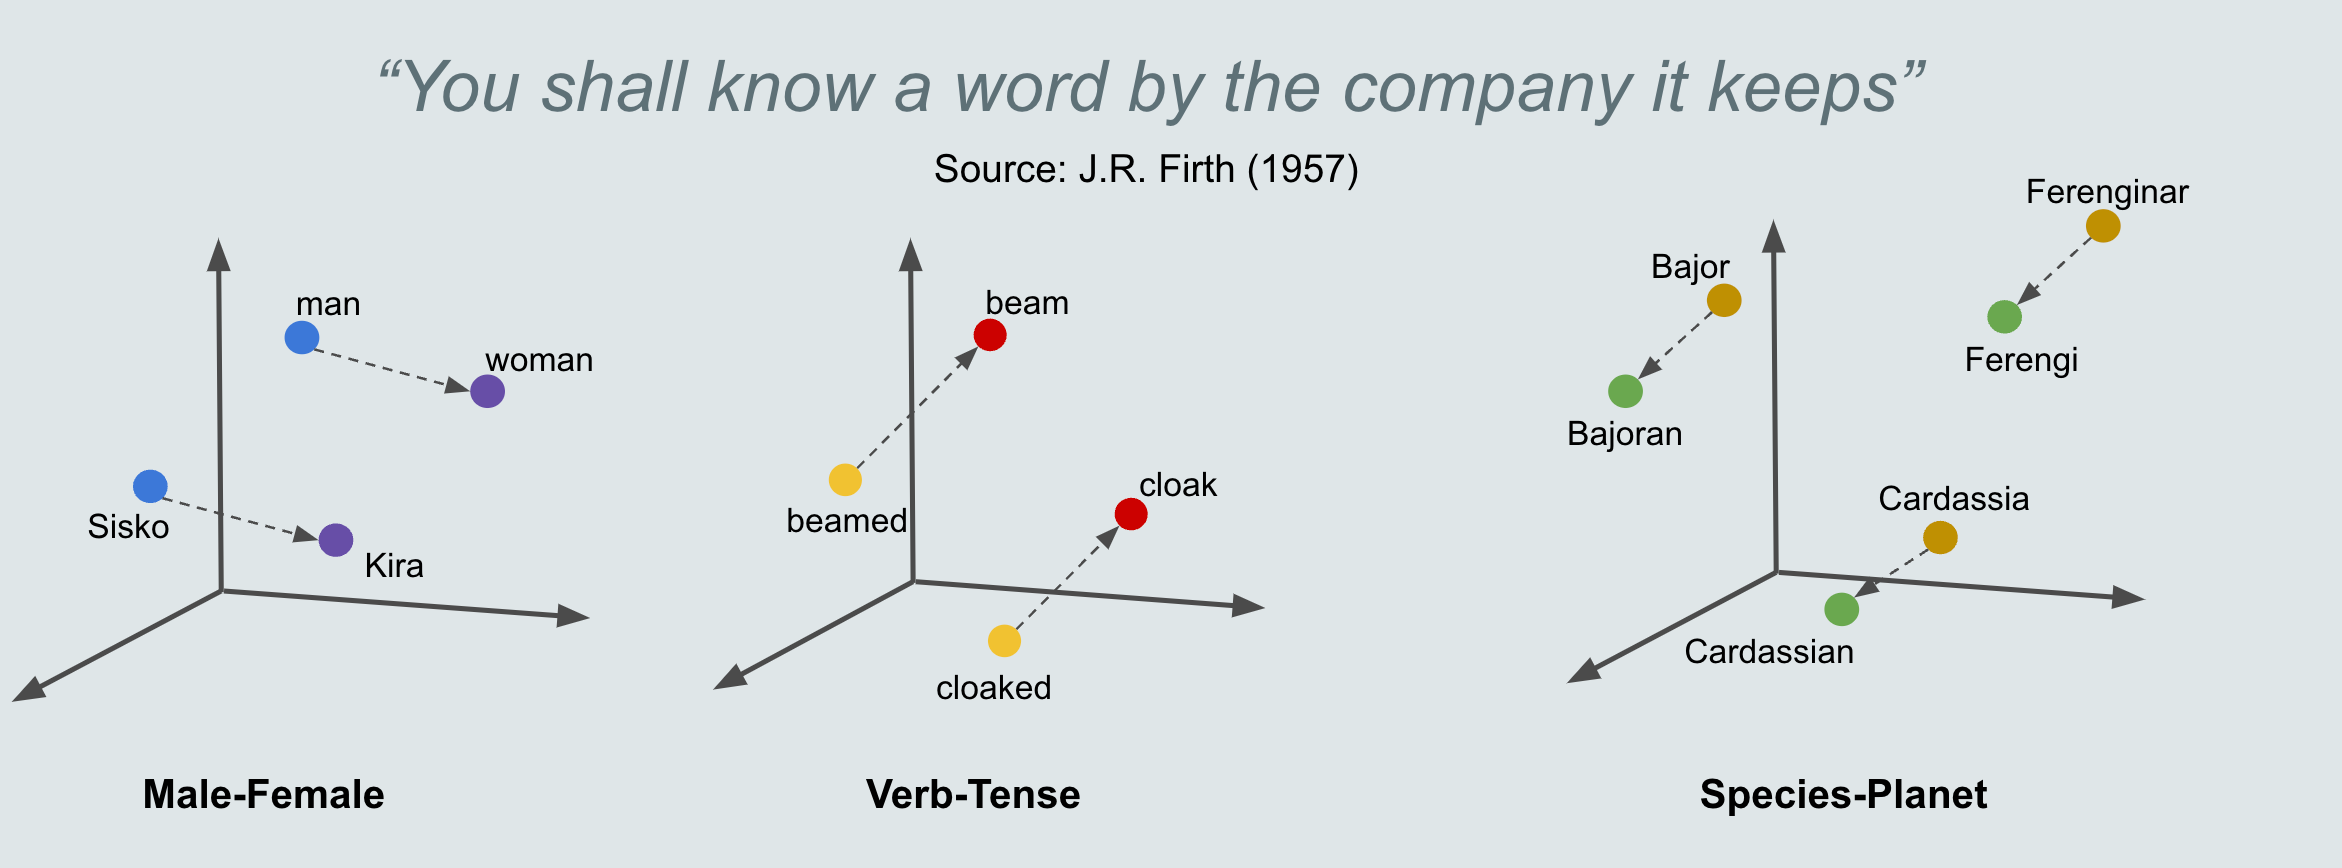

In [43]:
from IPython.display import Image
Image(filename='images/word2vec.jpeg')

## Embedding the text

### Loading pre-trained model word2vec

<font color='purple' size=4>We will start off by loading a pre-trained model.  We are using the Gensim library here. 
Source: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [44]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

2022-10-04 11:31:41,701 : INFO : loading projection weights from /Users/gretel.depaepe/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
2022-10-04 11:32:16,983 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from /Users/gretel.depaepe/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-10-04T11:32:16.979737', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'load_word2vec_format'}


In [45]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

<font color='purple' size=4>The big step forward here is that the algorithm - unlike Bag of Words - captures semantic meaning of words.  So if we ask for the most similar embedding to woman and king but different from man, we get queen.

In [46]:
# calculate: (king - man) + woman = ?
result = wv.most_similar(positive=['woman','king'], 
                         negative=['man'], topn=1)
print(result)

[('queen', 0.7118192911148071)]


Some other examples

In [47]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [48]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


<font color='purple' size=4>But we are still dealing with the Out of Vocab issue here.  As you can see the pretrained model has no clue what a raktajino is.

In [49]:
try:
    vec_cameroon = wv['raktajino']
except KeyError:
    print("The word 'raktajino' does not appear in this model")

The word 'raktajino' does not appear in this model


### Training a Word2Vec model on DS9 scripts

In [50]:
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
stopset = set(stopwords.words('english'))

#### Reading and preprocessing the data

We will not go through this section as it is the same as what we did for Bag of Words, except that we also split the sentences up into words.

In [51]:
PATH = 'ScriptsDS9/'
trn_files = !ls {PATH}
trn_files[:10] # as a test

['402.txt',
 '403.txt',
 '404.txt',
 '405.txt',
 '406.txt',
 '407.txt',
 '408.txt',
 '409.txt',
 '410.txt',
 '411.txt']

In [52]:
len(trn_files) # Total number of scripts

174

In [53]:
# concat all scripts
input_all = ''
counter = 0
for f in trn_files:
    if f != 'all_scripts.json':
        try:
            inputstring = open(PATH+f, 'r').read().lower()
            input_all += inputstring
        except:
            print(f, 'Error')
            counter += 1
print(counter, 'files not read')

414.txt Error
420.txt Error
459.txt Error
464.txt Error
468.txt Error
470.txt Error
472.txt Error
7 files not read


In [54]:
# A number of scripts did not load, due to char comversion issue
# Since the number is small, we will ignore

In [55]:
import re
# replace newline, tab and more than one space with one space
input_all = re.sub("\t",' ',input_all)
input_all = re.sub("\n",' ',input_all)
input_all = re.sub(' +',' ',input_all)

In [56]:
sentences = sent_tokenize(input_all)

In [57]:
len(sentences)

173634

In [58]:
# print a sample just to check
for i in range(15):
    print("---")
    print(sentences[50+i])

---
sisko's quarters (optical) destroyed... an explosion has ripped a hole in the floor... fire and smoke is streaking up through it... outside the window we can see evidence that the battle with the borg ship is continuing... sisko enters, sees his wife buried in rubble... he urgently pulls things away to get to her... he uncovers the upper part of her body... beside her is an unconscious nine year old boy... sisko (calm, controlled) it's gonna be okay... i'll get you out of there... you're gonna be okay... but he can't lift the wreckage that has crushed her lower half... his calm demeanor is betrayed by... deep space: "emissary" rev.
---
final 08/31/92 - teaser 6.
---
11 his hands desperately trying to lift heavy debris... 12 resume as he ignores the pain... but fails to make any headway, so he returns to the front and tries to pull the boy free... he's small enough to be eased out... he moves slightly, barely conscious, but not hurt critically... sisko okay, jake... we'll just get y

In [59]:
words_in_sentences = []
tokenizer = RegexpTokenizer(r'\w+')
for sentence in sentences:
    words = tokenizer.tokenize(sentence)
    words = [word for word in words if not word in stopset]
    words_in_sentences.append(words)

In [60]:
# print a sample just to check
for s in words_in_sentences[100:110]:
    print(s)

['space', 'ds9', 'optical', 'establishing']
['angle', 'see', 'enterprise', 'ships', 'docked']
['sisko', 'v']
['commence', 'station', 'log', 'deep', 'space', 'nine', 'commander', 'benjamin', 'sisko', 'stardate', 'xxxxx', 'x']
['request', 'bajoran', 'provisional', 'government', 'starfleet', 'agreed', 'establish', 'federation', 'presence', 'system', 'following', 'withdrawal', 'cardassian', 'occupational', 'forces']
['23', 'int']
['airlock', 'close', 'miles', 'brien', 'face', 'straining', 'physical', 'exertion', 'sweating', 'pulling', 'back', 'find', 'working', 'inside', 'open', 'panel', 'manually', 'working', 'levers', 'gears', 'starfleet', 'technology', 'means', 'struggles', 'airlock', 'slowly', 'opens', 'reveal', 'sisko', 'jake', 'standing', 'enter', 'brien', 'sorry', 'commander', 'interlock', 'servos', 'airlock', 'stripped', 'cardassians', 'sticks', 'hand', 'shake', 'realizes', 'covered', 'sludge', 'panel', 'pulls', 'back', 'brien', 'miles', 'brien', 'chief', 'operations', 'officer', '

#### Defining and training the model

In [61]:
from gensim.models import Word2Vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

<font color='purple' size=4>Let’s train our own Word2Vec model, for let’s say 50 epochs….

In [62]:
%%time
# train model
model = Word2Vec(words_in_sentences, min_count=5,epochs=50)

2022-10-04 11:33:41,384 : INFO : collecting all words and their counts
2022-10-04 11:33:41,385 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-10-04 11:33:41,395 : INFO : PROGRESS: at sentence #10000, processed 75514 words, keeping 8479 word types
2022-10-04 11:33:41,406 : INFO : PROGRESS: at sentence #20000, processed 142653 words, keeping 11663 word types
2022-10-04 11:33:41,416 : INFO : PROGRESS: at sentence #30000, processed 207584 words, keeping 13966 word types
2022-10-04 11:33:41,427 : INFO : PROGRESS: at sentence #40000, processed 269840 words, keeping 15659 word types
2022-10-04 11:33:41,436 : INFO : PROGRESS: at sentence #50000, processed 328224 words, keeping 16979 word types
2022-10-04 11:33:41,446 : INFO : PROGRESS: at sentence #60000, processed 387383 words, keeping 18104 word types
2022-10-04 11:33:41,456 : INFO : PROGRESS: at sentence #70000, processed 447844 words, keeping 19359 word types
2022-10-04 11:33:41,466 : INFO : PROGRESS: at se

2022-10-04 11:33:53,956 : INFO : EPOCH 29: training on 1030920 raw words (893929 effective words) took 0.4s, 2329748 effective words/s
2022-10-04 11:33:54,342 : INFO : EPOCH 30: training on 1030920 raw words (893498 effective words) took 0.4s, 2347344 effective words/s
2022-10-04 11:33:54,729 : INFO : EPOCH 31: training on 1030920 raw words (893268 effective words) took 0.4s, 2342226 effective words/s
2022-10-04 11:33:55,118 : INFO : EPOCH 32: training on 1030920 raw words (893642 effective words) took 0.4s, 2336633 effective words/s
2022-10-04 11:33:55,507 : INFO : EPOCH 33: training on 1030920 raw words (893176 effective words) took 0.4s, 2331149 effective words/s
2022-10-04 11:33:55,896 : INFO : EPOCH 34: training on 1030920 raw words (893731 effective words) took 0.4s, 2330343 effective words/s
2022-10-04 11:33:56,286 : INFO : EPOCH 35: training on 1030920 raw words (893335 effective words) took 0.4s, 2325271 effective words/s
2022-10-04 11:33:56,679 : INFO : EPOCH 36: training on 

CPU times: user 58.8 s, sys: 270 ms, total: 59.1 s
Wall time: 20.4 s


<font color='purple' size=4>This took slightly under a minute to complete on my laptop, no GPU required. Nice!

In [63]:
# save model
model.save('models/ds9_w2v.bin')
# load model
model = Word2Vec.load('models/ds9_w2v.bin')

2022-10-04 11:34:01,773 : INFO : Word2Vec lifecycle event {'fname_or_handle': 'models/ds9_w2v.bin', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-10-04T11:34:01.773943', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'saving'}
2022-10-04 11:34:01,775 : INFO : not storing attribute cum_table
2022-10-04 11:34:01,781 : INFO : saved models/ds9_w2v.bin
2022-10-04 11:34:01,781 : INFO : loading Word2Vec object from models/ds9_w2v.bin
2022-10-04 11:34:01,788 : INFO : loading wv recursively from models/ds9_w2v.bin.wv.* with mmap=None
2022-10-04 11:34:01,789 : INFO : setting ignored attribute cum_table to None
2022-10-04 11:34:01,855 : INFO : Word2Vec lifecycle event {'fname': 'models/ds9_w2v.bin', 'datetime': '2022-10-04T11:34:01.855296', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64

#### Examine the model

In [64]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

Let's have a look at the vocabulary

In [65]:
words = list(model.wv.key_to_index)
words[0:10]

['sisko',
 'space',
 'deep',
 'act',
 'kira',
 'quark',
 'odo',
 'bashir',
 'brien',
 'nine']

<font color='purple' size=4>So does our new model know what a raktajino is.  Yes! Here is the embedding:

In [66]:
model.wv['raktajino']

array([ 1.4917283e+00, -8.3109361e-01,  9.6239281e-01, -7.3330507e-02,
        5.7202280e-01, -1.4349771e+00,  1.2298880e+00, -8.8230431e-01,
       -4.7446284e-01, -1.1939533e+00, -9.1462958e-01,  1.0490320e+00,
       -1.3929855e+00, -1.6203961e+00, -4.3859512e-01,  2.3094665e-01,
       -1.3283739e+00,  1.2322581e+00, -9.8682338e-01, -2.7072787e+00,
       -3.3561832e-01,  1.1794428e-01, -1.6328425e+00, -2.5854716e-01,
        2.1003602e-01, -1.9225380e+00,  6.8424350e-01, -3.4087411e-01,
       -2.2845447e+00,  1.1198466e+00, -7.9847968e-01, -1.1506518e+00,
        5.8796439e-02,  2.9586111e-03,  2.2459747e-02, -4.1421631e-01,
        5.0096351e-01, -1.4975638e+00, -6.9258595e-01,  1.7069544e+00,
       -1.1037717e+00,  7.3672153e-02,  2.7176085e-01, -7.0859623e-01,
        4.6775386e-01, -1.8743082e+00,  2.2853084e+00, -3.5691115e-01,
       -2.9345092e-01, -5.2609426e-01,  3.0181476e-01,  2.9967618e+00,
        1.0338464e+00, -1.4208397e+00,  5.2899849e-01, -8.7348580e-01,
      

What are the top 5 most similar words to raktajino?

<font color='purple' size=4>What are the top 5 most similar words to raktajino?

In [68]:
result = model.wv.most_similar(positive=['raktajino'], topn=5)
print(result)

[('coffee', 0.6208449006080627), ('cup', 0.5998954772949219), ('tea', 0.5993326306343079), ('icoberry', 0.5594532489776611), ('soup', 0.5464160442352295)]


Can our model pick out the term which is out of place?

In [69]:
print(model.wv.doesnt_match(['yangtzee', 'defiant', 'runabout', 'trill']))

trill


In [70]:
result = model.wv.most_similar(positive=['runabout'], topn=5)
print(result)

[('raider', 0.6370381116867065), ('defiant', 0.6291996240615845), ('ship', 0.5984712839126587), ('shuttle', 0.5590366125106812), ('ganges', 0.5417418479919434)]


<font color='purple' size=4>And now for a Deep Space Nine version of the famous king-queen example…. When we ask the most similar vector to Kira and man, but dissimilar to woman, we get…

In [95]:
model.wv.most_similar(positive=['kira','man'], 
                      negative=['woman'], topn=1)

[('sisko', 0.547076940536499)]

In [72]:
model.wv.most_similar(positive=['sisko','woman'], 
                      negative=['man'], topn=1)

[('kira', 0.6827787756919861)]

### Fasttext and OOV words

The main principle behind fastText is that the morphological structure of a word carries important information about the meaning of the word. Such structure is not taken into account by traditional word embeddings like Word2Vec, which train a unique word embedding for every individual word. This is especially significant for morphologically rich languages (German, Turkish) in which a single word can have a large number of morphological forms, each of which might occur rarely, thus making it hard to train good word embeddings.
FastText attempts to solve this by treating each word as the aggregation of its subwords. For the sake of simplicity and language-independence, subwords are taken to be the character ngrams of the word. The vector for a word is simply taken to be the sum of all vectors of its component char-ngrams.
Source: https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html

In [73]:
model.wv['balance']

array([-2.2999375e-01,  1.4592874e+00,  5.1195137e-02,  9.4550163e-01,
       -5.6399561e-02, -5.5180001e-01, -6.9539994e-01, -1.9591314e+00,
        9.1656044e-02, -1.3810447e+00,  1.5787606e+00, -2.0180991e+00,
        2.1342103e-01, -6.2556279e-01, -1.0480167e+00,  1.1028389e+00,
        1.0626395e+00,  8.1847024e-01, -2.8347812e+00,  1.3301035e+00,
        1.6646172e-01,  7.2912075e-02,  4.2327237e-01, -1.3965205e-02,
       -7.6308584e-01,  4.5496583e-01,  6.5673947e-01, -9.5302784e-01,
        1.0622177e+00, -2.9848054e-02,  3.2797005e-02,  1.6382658e+00,
        4.8554701e-01,  3.6647600e-01, -1.3626542e+00,  6.0794908e-01,
       -1.3518265e+00, -4.8158422e-01,  8.0473560e-01,  9.1641504e-01,
        1.6667585e+00,  2.2390056e+00, -5.9203845e-01,  9.9324900e-01,
        3.5922101e-01,  1.6605043e+00, -1.8503307e+00, -1.1434603e+00,
       -1.5079457e+00,  8.0328548e-01, -2.0287178e-01,  1.2813220e+00,
        1.1277867e-01,  2.0822708e-01, -9.6088722e-02, -3.6054984e-01,
      

In [74]:
model.wv['balanced']

KeyError: "Key 'balanced' not present"

In [75]:
model.wv['raktagino']

KeyError: "Key 'raktagino' not present"

In [76]:
from gensim.models.fasttext import FastText
ft_model = FastText(min_count=5,
                    epochs=50)

2022-10-04 11:35:41,408 : INFO : FastText lifecycle event {'params': 'FastText<vocab=0, vector_size=100, alpha=0.025>', 'datetime': '2022-10-04T11:35:41.407730', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}


In [77]:
ft_model.build_vocab(words_in_sentences)

2022-10-04 11:35:41,710 : INFO : collecting all words and their counts
2022-10-04 11:35:41,717 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-10-04 11:35:41,738 : INFO : PROGRESS: at sentence #10000, processed 75514 words, keeping 8479 word types
2022-10-04 11:35:41,753 : INFO : PROGRESS: at sentence #20000, processed 142653 words, keeping 11663 word types
2022-10-04 11:35:41,764 : INFO : PROGRESS: at sentence #30000, processed 207584 words, keeping 13966 word types
2022-10-04 11:35:41,774 : INFO : PROGRESS: at sentence #40000, processed 269840 words, keeping 15659 word types
2022-10-04 11:35:41,784 : INFO : PROGRESS: at sentence #50000, processed 328224 words, keeping 16979 word types
2022-10-04 11:35:41,795 : INFO : PROGRESS: at sentence #60000, processed 387383 words, keeping 18104 word types
2022-10-04 11:35:41,805 : INFO : PROGRESS: at sentence #70000, processed 447844 words, keeping 19359 word types
2022-10-04 11:35:41,815 : INFO : PROGRESS: at se

In [78]:
ft_model.train(words_in_sentences,
               total_examples=ft_model.corpus_count,
               epochs=ft_model.epochs)

2022-10-04 11:35:44,357 : INFO : FastText lifecycle event {'msg': 'training model with 3 workers on 11102 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5 shrink_windows=True', 'datetime': '2022-10-04T11:35:44.357963', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2022-10-04 11:35:45,365 : INFO : EPOCH 0 - PROGRESS: at 71.84% examples, 656321 words/s, in_qsize 5, out_qsize 0
2022-10-04 11:35:45,683 : INFO : EPOCH 0: training on 1030920 raw words (893342 effective words) took 1.3s, 677439 effective words/s
2022-10-04 11:35:46,699 : INFO : EPOCH 1 - PROGRESS: at 69.74% examples, 633077 words/s, in_qsize 5, out_qsize 0
2022-10-04 11:35:47,043 : INFO : EPOCH 1: training on 1030920 raw words (893261 effective words) took 1.4s, 660035 effective words/s
2022-10-04 11:35:48,078 : INFO : EPOCH 2 - PROGRESS: at 75.91% examples, 672826 words/s, in_qsize 5, out_qsize

2022-10-04 11:36:26,965 : INFO : EPOCH 32 - PROGRESS: at 78.01% examples, 704244 words/s, in_qsize 5, out_qsize 0
2022-10-04 11:36:27,224 : INFO : EPOCH 32: training on 1030920 raw words (893661 effective words) took 1.3s, 706079 effective words/s
2022-10-04 11:36:28,235 : INFO : EPOCH 33 - PROGRESS: at 78.01% examples, 707140 words/s, in_qsize 5, out_qsize 0
2022-10-04 11:36:28,479 : INFO : EPOCH 33: training on 1030920 raw words (893497 effective words) took 1.2s, 716556 effective words/s
2022-10-04 11:36:29,489 : INFO : EPOCH 34 - PROGRESS: at 75.91% examples, 689213 words/s, in_qsize 5, out_qsize 0
2022-10-04 11:36:29,749 : INFO : EPOCH 34: training on 1030920 raw words (893235 effective words) took 1.3s, 706819 effective words/s
2022-10-04 11:36:30,756 : INFO : EPOCH 35 - PROGRESS: at 75.91% examples, 691258 words/s, in_qsize 5, out_qsize 0
2022-10-04 11:36:31,012 : INFO : EPOCH 35: training on 1030920 raw words (893674 effective words) took 1.3s, 711044 effective words/s
2022-10-

(44678142, 51546000)

In [79]:
print('raktagino' in ft_model.wv.key_to_index)

False


fastText can obtain vectors even for out-of-vocabulary (OOV) words, by summing up vectors for its component char-ngrams, provided at least one of the char-ngrams was present in the training data.

In [80]:
ft_model.wv['raktagino']

array([-0.10916875, -0.59683883, -0.30500653,  0.4899483 , -0.15790533,
       -0.5884554 ,  0.79897904,  0.7221397 , -0.3986881 , -0.134144  ,
       -0.37137407, -0.6607511 ,  0.15011741, -0.26960373, -0.44958857,
        0.38616553,  0.43403873, -0.10400216,  0.93534964,  0.34331644,
       -0.0418251 ,  0.54502094, -0.0144732 , -0.3238817 ,  0.16842608,
        1.3151906 , -0.27233785,  0.26988024,  0.11808985, -0.14774634,
        0.486952  ,  0.16243789,  0.29044122,  0.0942672 , -0.3367292 ,
       -0.00374785, -0.08668992, -0.29968423,  0.57934725, -0.39560476,
       -0.03128766,  0.59434325,  1.0953689 ,  0.38310543, -0.8012905 ,
       -0.45839757, -0.11259393, -0.33246496, -0.10364313, -0.3047089 ,
       -0.48723274,  0.12029444, -0.5387741 ,  0.1494454 ,  0.01355726,
        1.306753  ,  0.4490887 ,  0.32610264, -0.11238553, -0.36803514,
       -0.3723093 , -0.4195271 , -0.16220503, -0.2509223 , -0.2531587 ,
       -0.35076907, -0.57124406,  0.15895303,  0.6407383 ,  1.26

## Semantic similarity

In [81]:
corpus = ['Sisko is talking to Kira',
          'The Commander is talking to the Major',
          'Sisko is talking over the intercom']

In [82]:
pairs = [
    ('sisko', 'commander'),   
    ('sisko', 'major'),
    ('kira', 'major'),
    ('kira', 'commander'),
    ('kira', 'intercom'),
    ('sisko', 'sisko')]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, model.wv.similarity(w1, w2)))

'sisko'	'commander'	0.30
'sisko'	'major'	0.20
'kira'	'major'	0.27
'kira'	'commander'	0.18
'kira'	'intercom'	-0.00
'sisko'	'sisko'	1.00


### Cosine Similarity Mean Vector

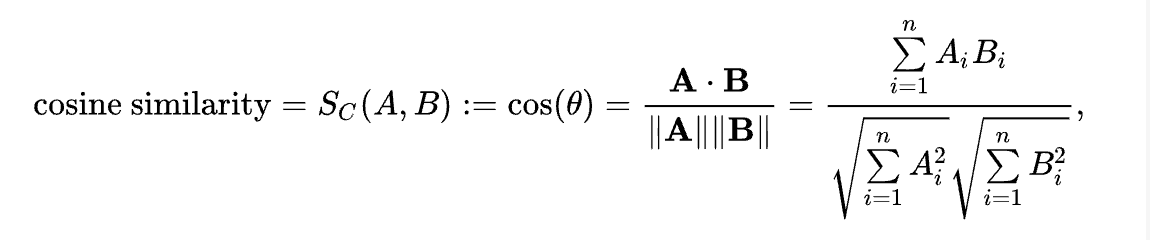

In [83]:
from IPython.display import Image
Image(filename='images/cosine.jpg')

In [84]:
from gensim.parsing.preprocessing import STOPWORDS
corpus_processed = []
for c in corpus:
    corpus_processed.append([w.lower() for w in c.split() if w.lower() not in STOPWORDS])
corpus_processed

[['sisko', 'talking', 'kira'],
 ['commander', 'talking', 'major'],
 ['sisko', 'talking', 'intercom']]

In [85]:
corpus_vec = []
for doc in corpus_processed:
    doc_vec = []
    for word in doc:
        doc_vec.append(list(model.wv[word.lower()]))
    corpus_vec.append(list(doc_vec))
corpus_doc_vec = np.array(corpus_vec).mean(axis=1)

In [86]:
corpus_doc_vec[0]

array([-0.55903536, -0.8202923 ,  0.7606396 , -0.8660962 ,  0.76872206,
        0.6150411 ,  0.56639796, -0.96173406,  0.798228  , -0.36417207,
       -0.112272  , -0.08415965, -0.6706776 , -0.04940053, -2.0235584 ,
        1.059684  , -0.29188707,  1.7530142 ,  0.5336856 , -0.11604691,
       -1.0757751 ,  0.64909124, -1.4317459 ,  0.9246518 ,  0.13147761,
       -0.10863883, -0.47962475, -0.35008118,  0.15240568, -0.5834985 ,
       -0.44591936,  0.51175696,  0.28397202,  0.6631584 , -0.05967217,
        0.8445881 ,  0.41860285, -0.91493845,  0.24139829,  0.9079575 ,
       -0.59602195,  0.02723977, -0.5801629 ,  0.41150495, -0.96713823,
        0.01357522, -0.38566527, -0.04748278,  0.7158422 ,  0.11210681,
        0.18261176, -0.02351963,  0.7806074 ,  0.47727165,  1.2034634 ,
        0.00428613, -0.95130587,  1.2908854 ,  1.3183327 , -0.6610449 ,
        0.03559307,  0.40648732,  0.38044858, -0.47187647,  0.39960837,
       -0.6669872 ,  0.16202761, -0.9088504 ,  0.37662777, -0.84

In [87]:
import numpy as np
from numpy.linalg import norm
cosine = np.dot(corpus_doc_vec[0], corpus_doc_vec[1])/(norm(corpus_doc_vec[0])*norm(corpus_doc_vec[1]))
print("Cosine Similarity sentence 0 and 1:", cosine)
cosine = np.dot(corpus_doc_vec[0], corpus_doc_vec[2])/(norm(corpus_doc_vec[0])*norm(corpus_doc_vec[2]))
print("Cosine Similarity sentence 0 and 2:", cosine)

Cosine Similarity sentence 0 and 1: 0.5702038
Cosine Similarity sentence 0 and 2: 0.92772734


### Euclidean Distance Mean Vector

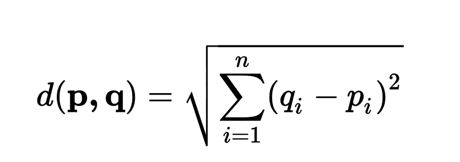

In [88]:
Image(filename='images/euclidean.png')

In [89]:
import numpy as np
from numpy.linalg import norm
euclid = norm(corpus_doc_vec[0] - corpus_doc_vec[1])
print("Euclidean Distance sentence 0 and 1:", euclid)
euclid = norm(corpus_doc_vec[0] - corpus_doc_vec[2])
print("Euclidean Distance sentence 0 and 2:", euclid)

Euclidean Distance sentence 0 and 1: 7.553571
Euclidean Distance sentence 0 and 2: 3.0039434


### Word Movers Distance

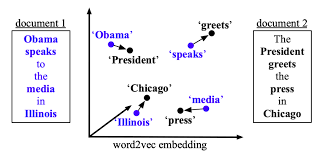

In [90]:
Image(filename='images/wmd.png')

In [91]:
def word_movers_distance(model, sentence_a, sentence_b):
    sentence_a = [w.lower() for w in sentence_a if w.lower() not in STOPWORDS]
    sentence_b = [w.lower() for w in sentence_b if w.lower() not in STOPWORDS]
    distance = model.wv.wmdistance(sentence_a, sentence_b)
    return distance

In [92]:
print("Word Movers Distance between sentence 0 and 1:", word_movers_distance(model, 
                                                                             corpus[0].split(), 
                                                                             corpus[1].split()))
print("Word Movers Distance between sentence 0 and 2:", word_movers_distance(model,
                                                                             corpus[0].split(),
                                                                             corpus[2].split()))

2022-10-04 11:36:49,013 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-10-04 11:36:49,013 : INFO : built Dictionary<5 unique tokens: ['kira', 'sisko', 'talking', 'commander', 'major']> from 2 documents (total 6 corpus positions)
2022-10-04 11:36:49,014 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<5 unique tokens: ['kira', 'sisko', 'talking', 'commander', 'major']> from 2 documents (total 6 corpus positions)", 'datetime': '2022-10-04T11:36:49.014269', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2022-10-04 11:36:49,018 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-10-04 11:36:49,018 : INFO : built Dictionary<4 unique tokens: ['kira', 'sisko', 'talking', 'intercom']> from 2 documents (total 6 corpus positions)
2022-10-04 11:36:49,019 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<4 unique tokens: ['kira', 'si

Word Movers Distance between sentence 0 and 1: 0.7983604497879752
Word Movers Distance between sentence 0 and 2: 0.4719984590871813


Although we have come a long way, it does not always work out as we would like.  Us humans we understand that sentence 0 and 1 most likely mean the same.